# Plotting Choropleth Maps using Python
---
A choropleth map uses colour coding to indicate quantitative values across geographical areas on a map.

![](https://datavizcatalogue.com/methods/images/anatomy/choropleth.png)

>A choropleth map is a type of thematic map in which areas are shaded or patterned in proportion to a statistical variable that represents an aggregate summary of a geographic characteristic within each area, such as population density or per-capita income.

## Terminologies
---

## [Plotly](https://plotly.com/)
Plotly is a technical computing company that develops online data analytics and visualization tools. Plotly provides online graphing, analytics, and statistics tools for individuals and collaboration, as well as scientific graphing libraries for Python, R, MATLAB, Perl, Julia, Arduino, and REST.

### [plotly.py](https://plotly.com/python/)
An interactive, open-source, and browser-based graphing library for Python.

```bash
$ pip install plotly
```

>Plotly Express is a new high-level Python visualization library: it's a wrapper for Plotly.py that exposes a simple syntax for complex charts.

### [GeoJSON](https://geojson.org/)
An open standard format designed for representing simple geographical features, along with their non-spatial attributes.

### [Mapbox](https://mapbox.com/)
An open source mapping platform for custom designed maps.

In [1]:
import json
import numpy as np
import pandas as pd
import plotly.express as px

In [2]:
import plotly.io as pio
pio.renderers.default = 'browser'

In [3]:
india_states = json.load(open("states_india.geojson", "r"))

In [4]:
#india_states["features"][9]

In [5]:
state_id_map = {}
for feature in india_states["features"]:
    feature["id"] = feature["properties"]["state_code"]
    state_id_map[feature["properties"]["st_nm"]] = feature["id"]
state_id_map

{'Telangana': 0,
 'Andaman & Nicobar Island': 35,
 'Andhra Pradesh': 28,
 'Arunanchal Pradesh': 12,
 'Assam': 18,
 'Bihar': 10,
 'Chhattisgarh': 22,
 'Daman & Diu': 25,
 'Goa': 30,
 'Gujarat': 24,
 'Haryana': 6,
 'Himachal Pradesh': 2,
 'Jammu & Kashmir': 1,
 'Jharkhand': 20,
 'Karnataka': 29,
 'Kerala': 32,
 'Lakshadweep': 31,
 'Madhya Pradesh': 23,
 'Maharashtra': 27,
 'Manipur': 14,
 'Chandigarh': 4,
 'Puducherry': 34,
 'Punjab': 3,
 'Rajasthan': 8,
 'Sikkim': 11,
 'Tamil Nadu': 33,
 'Tripura': 16,
 'Uttar Pradesh': 9,
 'Uttarakhand': 5,
 'West Bengal': 19,
 'Odisha': 21,
 'Dadara & Nagar Havelli': 26,
 'Meghalaya': 17,
 'Mizoram': 15,
 'Nagaland': 13,
 'NCT of Delhi': 7}

In [6]:
df = pd.read_csv("data.csv")
df

,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,AEFI,18-30 years (Age),30-45 years (Age),45-60 years (Age),60+ years (Age)
0,Andaman & Nicobar Island,100058.0,4000.0,35.0,100058.0,15130.0,53903.0,46147.0,8.0,0.0,115188.0,2.0,2303.0,8144.0,59293.0,30316.0
1,Andhra Pradesh,5484714.0,100480.0,968.0,5484714.0,2167213.0,2813644.0,2670349.0,721.0,1325533.0,6326394.0,324.0,404071.0,569847.0,2494640.0,2015088.0
2,Arunanchal Pradesh,218759.0,12950.0,98.0,218759.0,77881.0,123119.0,95558.0,82.0,0.0,296640.0,263.0,17924.0,44392.0,112249.0,44162.0
3,Assam,2631676.0,151160.0,1230.0,2631676.0,730877.0,1426380.0,1204930.0,366.0,694297.0,2668256.0,175.0,182803.0,367548.0,1322968.0,758184.0
4,Bihar,7180068.0,472610.0,2588.0,7180068.0,1689456.0,3829966.0,3349038.0,1064.0,593607.0,8275917.0,185.0,551917.0,716683.0,2745972.0,3164192.0
5,Chandigarh,211162.0,8300.0,63.0,211162.0,73672.0,118975.0,92173.0,14.0,0.0,284834.0,103.0,11839.0,22114.0,105722.0,71458.0
6,Chhattisgarh,5058803.0,463120.0,3563.0,5058803.0,1079462.0,2473087.0,2585157.0,559.0,158098.0,5980167.0,551.0,131259.0,324791.0,2867587.0,1734851.0
7,Dadara & Nagar Havelli,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Goa,342243.0,12108.0,90.0,342243.0,94215.0,173190.0,169032.0,21.0,2828.0,433630.0,556.0,17763.0,28588.0,158645.0,137232.0
9,Gujarat,11213044.0,212660.0,1637.0,11213044.0,3842538.0,5982566.0,5229067.0,1411.0,1647234.0,13408348.0,965.0,750553.0,1197495.0,5068749.0,4193758.0


<AxesSubplot:>

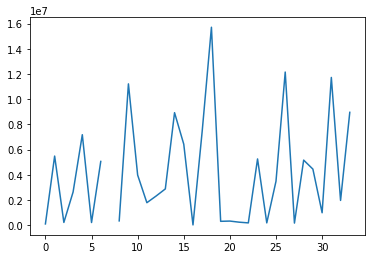

In [7]:
df["id"] = df["State"].apply(lambda x: state_id_map[x])
df["Total Individuals Vaccinated"].plot()

In [8]:
#df["DensityScale"] = np.log10(df["Density"])

In [9]:
#df["DensityScale"].plot()

In [10]:
fig = px.choropleth(
    df,
    locations="id",
    geojson=india_states,
    color="Total Individuals Vaccinated",
    hover_name="State",
    hover_data=["Total Individuals Vaccinated"],
    title="India Vaccination Data",
)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

![](https://i.imgur.com/WZWtu67.png)

In [11]:
fig = px.choropleth_mapbox(
    df,
    locations="id",
    geojson=india_states,
    color="Total Individuals Vaccinated",
    hover_name="State",
    hover_data=["Total Individuals Vaccinated"],
    title="India Vaccination Data",
    mapbox_style="carto-positron",
    center={"lat": 24, "lon": 78},
    zoom=3,
    opacity=0.5,
)
fig.show()

![](https://i.imgur.com/az9x32O.png)

In [12]:
df["SexRatioScale"] = df["Sex ratio"] - 1000

KeyError: 'Sex ratio'

In [ ]:
fig = px.choropleth(
    df,
    locations="id",
    geojson=india_states,
    color="SexRatioScale",
    hover_name="State",
    hover_data=["Total Individuals Vaccinated"],
    title="India Sex Ratio",
    color_continuous_scale=px.colors.diverging.BrBG,
    color_continuous_midpoint=0,
)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

![](https://i.imgur.com/0ZIBaR6.png)

## References

- https://en.wikipedia.org/wiki/List_of_states_and_union_territories_of_India_by_population

- https://un-mapped.carto.com/tables/states_india/public/map

- https://plotly.com/python/choropleth-maps/

- https://plotly.com/python/colorscales/

- https://www.mapbox.com/

- https://plotly.com/python/mapbox-county-choropleth/

- https://plotly.com/python/mapbox-layers/